In [1]:
# 1. explore & clean the data
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Clean continuous variables

In [2]:
# fill missing for age
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)

In [ ]:
# Combine SibSp & Parch

<Figure size 432x288 with 0 Axes>

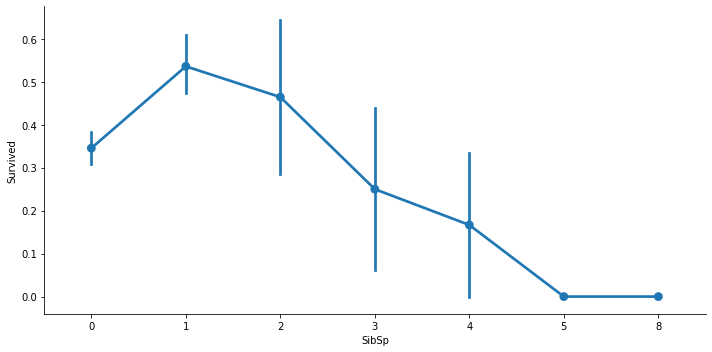

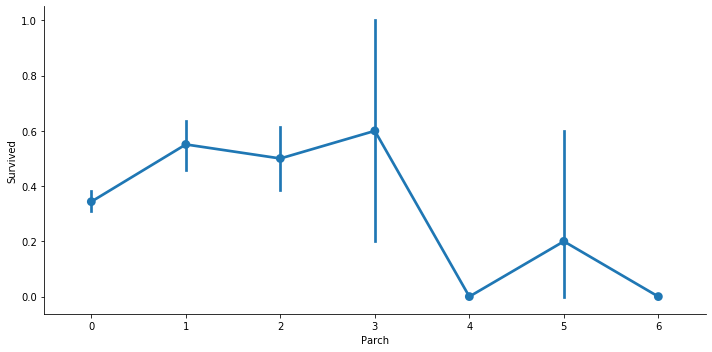

In [4]:
for i, col in enumerate(['SibSp', 'Parch']):
    plt.figure(i)
    sns.catplot(x=col, y='Survived', data=titanic, kind='point', aspect=2, )

In [5]:
titanic['Family_cnt'] = titanic['SibSp'] + titanic['Parch']

In [6]:
# Drop unnecessary variables
titanic.drop(['PassengerId', 'SibSp', 'Parch'], axis=1, inplace=True)

In [7]:
titanic.head(10)

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.000000,373450,8.0500,NaN,S,0
5,0,3,"Moran, Mr. James",male,29.699118,330877,8.4583,NaN,Q,0
6,0,1,"McCarthy, Mr. Timothy J",male,54.000000,17463,51.8625,E46,S,0
7,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,349909,21.0750,NaN,S,4
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,347742,11.1333,NaN,S,2
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,237736,30.0708,NaN,C,1


In [8]:
# Write out cleaned data
titanic.to_csv('titanic_cleaned.csv', index=False)

In [9]:
# Read in new data
import numpy as np
import pandas as pd

titanic = pd.read_csv('titanic_cleaned.csv')
titanic.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


In [10]:
# Create indicator for Cabin
titanic['Cabin_ind'] = np.where(titanic['Cabin'].isnull(), 0, 1)

In [11]:
# Convert Sex to numeric
gender_num = {'male': 0, 'female': 1}
titanic['Sex'] = titanic['Sex'].map(gender_num)

In [12]:
# Drop unnecessary
titanic.drop(['Cabin', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [13]:
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Family_cnt,Cabin_ind
0,0,3,0,22.0,7.2500,1,0
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,1,1
4,0,3,0,35.0,8.0500,0,0


In [14]:
# Write cleaned data
titanic.to_csv('titanic_cleaned.csv', index=False)

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split

titanic = pd.read_csv('titanic_cleaned.csv')
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Family_cnt,Cabin_ind
0,0,3,0,22.0,7.2500,1,0
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,1,1
4,0,3,0,35.0,8.0500,0,0


In [16]:
# 2. Split data into train/validation/test
features = titanic.drop('Survived', axis=1)
labels = titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [17]:
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset) / len(labels), 2))

0.6
0.2
0.2


In [18]:
X_train.to_csv('train_features.csv', index=False)
X_val.to_csv('val_features.csv', index=False)
X_test.to_csv('test_features.csv', index=False)

y_train.to_csv('train_labels.csv', index=False)
y_val.to_csv('val_labels.csv', index=False)
y_test.to_csv('test_labels.csv', index=False)

C:\anaconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """
C:\anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  
C:\anaconda\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  import sys


In [21]:
# 3. Fit an inital model and evaluate
# Cross-validation
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

tr_features = pd.read_csv('train_features.csv')
tr_labels= pd.read_csv('train_labels.csv', header=None)

In [25]:
rf = RandomForestClassifier()

scores = cross_val_score(rf, tr_features, tr_labels.values.ravel(), cv=5)

In [27]:
scores

array([0.82407407, 0.85981308, 0.77570093, 0.77358491, 0.80188679])

In [29]:
# 4. Tune hyperparameters
# hyperparameters -- max depth of tree, features to consider, etc.
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# GridSearchCV exhaustively considers all parameter combinations, while RandomizedSearchCV can sample a 
# given number of candidates from a parameter space with a specified distribution.

tr_features = pd.read_csv('train_features.csv')
tr_labels= pd.read_csv('train_labels.csv', header=None)

In [37]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))
    
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [39]:
rf = RandomForestClassifier()
# random forest classifier is a collection of decision trees
parameters = {
    'n_estimators': [5, 50, 100],
    'max_depth': [2, 10, 20, None]
}
# 12 total combinations, for each combination it is running a 5 fold cross validation
# 12 * 5 = 60 models

cv = GridSearchCV(rf, parameters, cv=5)
#values.ravel is for converting the traning label to array
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)
# the results show that the best model has lower max depth and lower number of estimators. 
# It suggests that maybe the default values lead to a little bit of overfitting.

BEST PARAMS: {'max_depth': 10, 'n_estimators': 50}

0.788 (+/-0.115) for {'max_depth': 2, 'n_estimators': 5}
0.796 (+/-0.116) for {'max_depth': 2, 'n_estimators': 50}
0.796 (+/-0.108) for {'max_depth': 2, 'n_estimators': 100}
0.816 (+/-0.046) for {'max_depth': 10, 'n_estimators': 5}
0.828 (+/-0.052) for {'max_depth': 10, 'n_estimators': 50}
0.82 (+/-0.044) for {'max_depth': 10, 'n_estimators': 100}
0.785 (+/-0.077) for {'max_depth': 20, 'n_estimators': 5}
0.807 (+/-0.048) for {'max_depth': 20, 'n_estimators': 50}
0.809 (+/-0.035) for {'max_depth': 20, 'n_estimators': 100}
0.792 (+/-0.033) for {'max_depth': None, 'n_estimators': 5}
0.809 (+/-0.034) for {'max_depth': None, 'n_estimators': 50}
0.805 (+/-0.028) for {'max_depth': None, 'n_estimators': 100}


C:\anaconda\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [44]:
# 5. Evaluate on validation set
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

tr_features = pd.read_csv('train_features.csv')
tr_labels= pd.read_csv('train_labels.csv', header=None)

val_features = pd.read_csv('val_features.csv')
val_labels= pd.read_csv('val_labels.csv', header=None)

te_features = pd.read_csv('test_features.csv')
te_labels= pd.read_csv('test_labels.csv', header=None)

In [48]:
# best
rf1 = RandomForestClassifier(n_estimators=50, max_depth=10)
rf1.fit(tr_features, tr_labels.values.ravel())
# second best
rf2 = RandomForestClassifier(n_estimators=100, max_depth=10)
rf2.fit(tr_features, tr_labels.values.ravel())
# third best
rf3 = RandomForestClassifier(n_estimators=5, max_depth=10)
rf3.fit(tr_features, tr_labels.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [50]:
for mdl in [rf1, rf2, rf3]:
    y_pred = mdl.predict(val_features)
    accuracy = round(accuracy_score(val_labels, y_pred), 3)
    precision = round(precision_score(val_labels, y_pred), 3)
    recall = round(recall_score(val_labels, y_pred), 3)
    print('MAX DEPTH: {} / # OF EST: {} -- A: {} / P: {} / R: {}'.format(mdl.max_depth,
                                                                        mdl.n_estimators,
                                                                        accuracy,
                                                                        precision,
                                                                        recall))

MAX DEPTH: 10 / # OF EST: 50 -- A: 0.816 / P: 0.831 / R: 0.711
MAX DEPTH: 10 / # OF EST: 100 -- A: 0.827 / P: 0.846 / R: 0.724
MAX DEPTH: 10 / # OF EST: 5 -- A: 0.821 / P: 0.855 / R: 0.697


In [53]:
# 6. Final model selection and evaluation on test set
# rf2 is the best
y_pred = rf2.predict(test_features)
accuracy = round(accuracy_score(te_labels, y_pred), 3)
precision = round(precision_score(te_labels, y_pred), 3)
recall = round(recall_score(te_labels, y_pred), 3)
print('MAX DEPTH: {} / # OF EST: {} -- A: {} / P: {} / R: {}'.format(rf2.max_depth,
                                                                    rf2.n_estimators,
                                                                    accuracy,
                                                                    precision,
                                                                    recall))
# the performance of a given model varies based on the data you give to it. The exact same model being fed to 
# two data sets that are randomly sampled has different accuracy. They do look simmilar, but testing model 
# in unseen data is critical. It should sucessfully generalizes to unseen examples.

MAX DEPTH: 10 / # OF EST: 100 -- A: 0.792 / P: 0.741 / R: 0.662
